# Open class in Natural Language Processing
by __Felipe Buchbinder__

> __Natural language processing (NLP)__ is (…) concerned with the interactions between computers and human language, in particular how to program computers to process and analyze (…) natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. (Wikipedia)

> NLP is Machine Learning for language

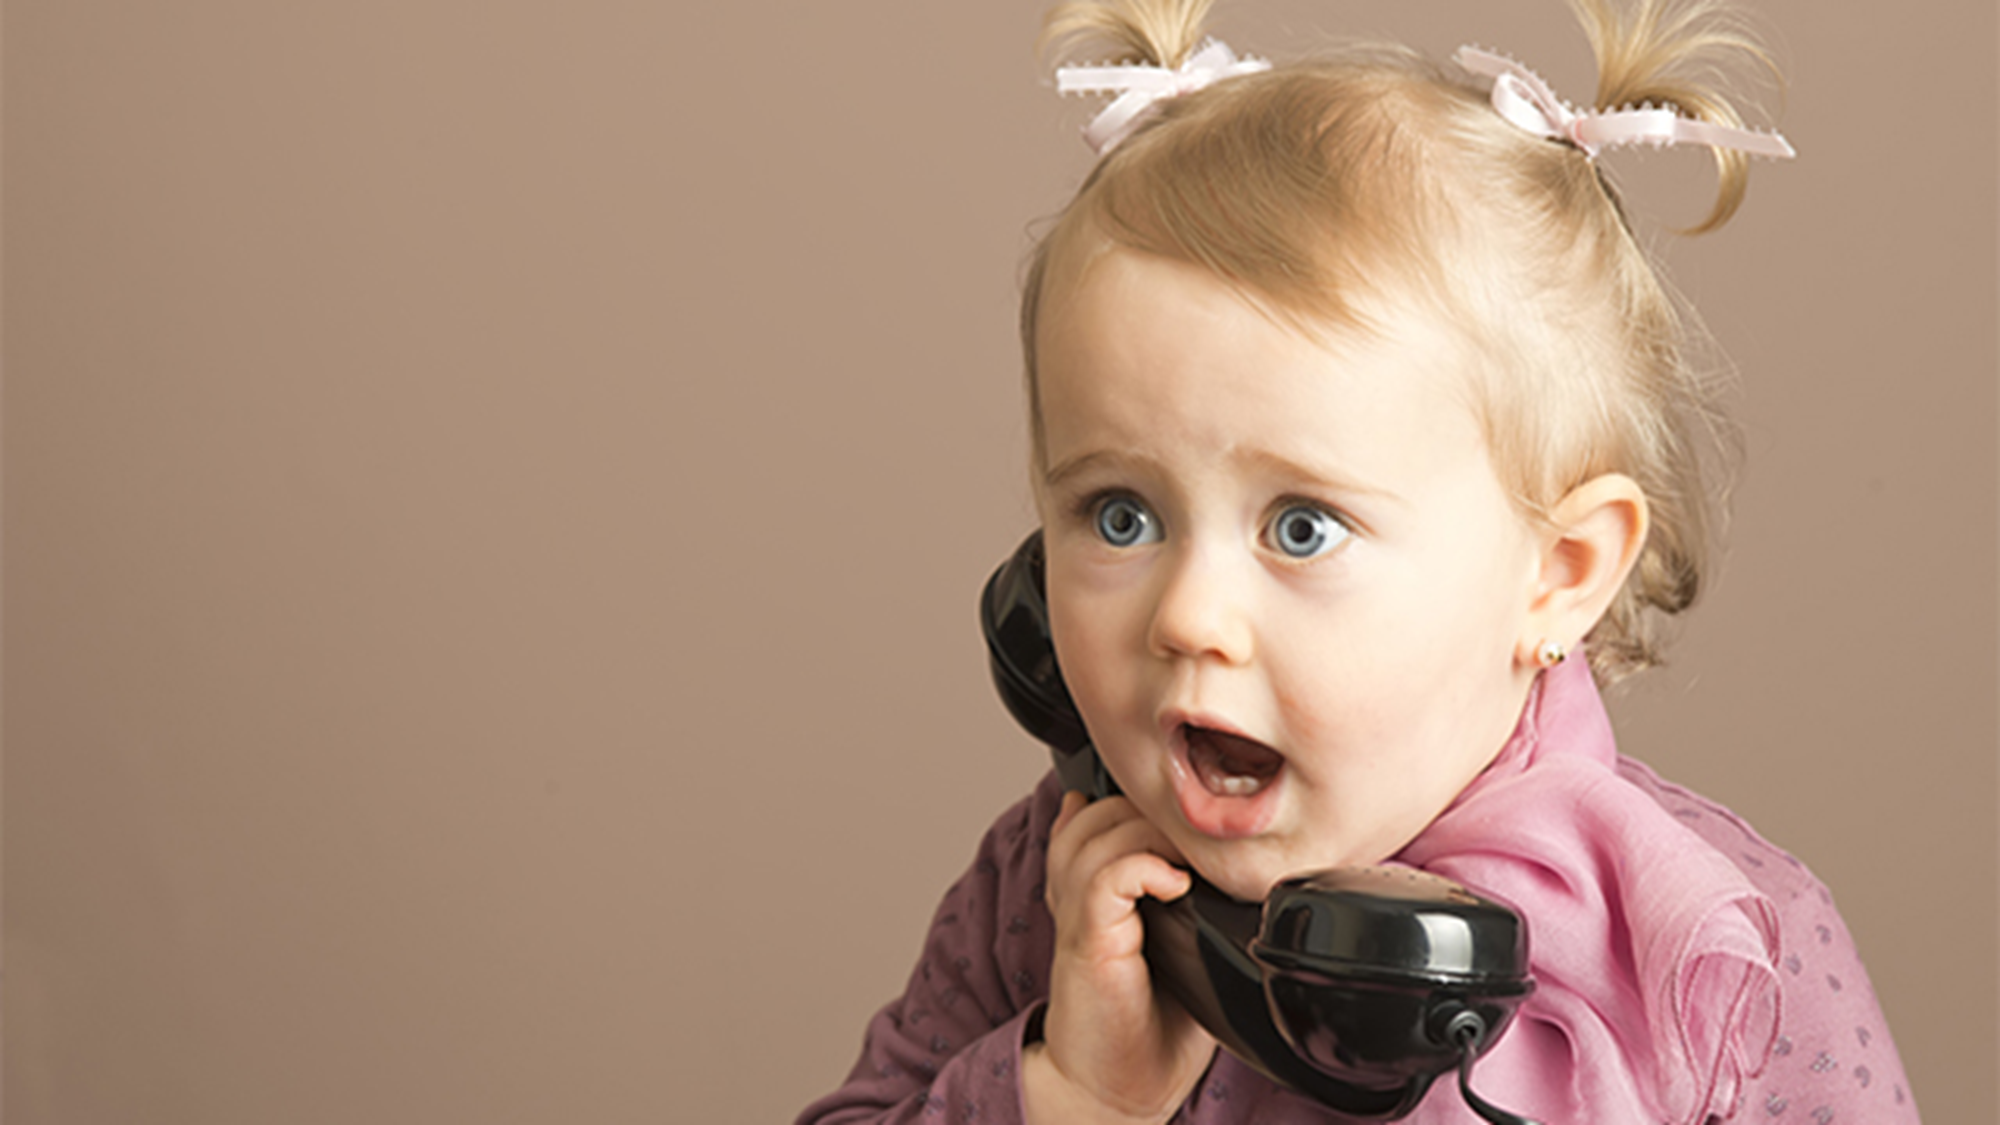


# Machine Learning models with text



***
# Part 1: From text to data

## Import packages

In [54]:
import pandas as pd
import string
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#nltk.download('omw-1.4')

## Load data

In [55]:
url = 'https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'

In [56]:
data = pd.read_csv(url, encoding='latin1', usecols=['v1','v2'])
data.columns = ['label','raw_text']
data['text'] = data.raw_text

In [57]:
data.sample(10)

,label,raw_text,text
4158,ham,Now got tv 2 watch meh? U no work today?,Now got tv 2 watch meh? U no work today?
4376,ham,How much is torch in 9ja.,How much is torch in 9ja.
4219,ham,U free on sat rite? U wan 2 watch infernal aff...,U free on sat rite? U wan 2 watch infernal aff...
4512,spam,Money i have won wining number 946 wot do i do...,Money i have won wining number 946 wot do i do...
3667,ham,Thanks for loving me so. You rock,Thanks for loving me so. You rock
5474,ham,Where's mummy's boy ? Is he being good or bad ...,Where's mummy's boy ? Is he being good or bad ...
1780,spam,BIG BROTHER ALERT! The computer has selected u...,BIG BROTHER ALERT! The computer has selected u...
4546,ham,Hey mate. Spoke to the mag people. WeÛ÷re on....,Hey mate. Spoke to the mag people. WeÛ÷re on....
309,ham,Where are the garage keys? They aren't on the ...,Where are the garage keys? They aren't on the ...
971,ham,"Haha awesome, omw back now then","Haha awesome, omw back now then"


## Pre-processing steps

1. Remove punctuation
2. Remove capitalization
3. Remove numbers
4. Tokenization
5. Remove stopwords
6. Stemming / Lemmatizing
7. Expressing text as numbers. (Computer can only work with numbers, you know...)

## Remove punctuation

In [58]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [59]:
data['text'] = data.text.apply(remove_punctuation)
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


## Remove capitalization
Let's set everything to lower case.
(Quersion: Why not upper case?)

In [60]:
data['text']= data['text'].apply(lambda x: x.lower())
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## Remove numbers

In [61]:
def remove_number(string):
    return(re.sub(r'[0-9]*','',string))

In [62]:
data['text'] = data.text.apply(lambda x: remove_number(x))
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


_Note_: In line 2, the number 2 has disappeared

## Tokenization
* What is a token?
* Does token = word?
* grams, bigrams, trigrams and n-grams

In [63]:
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

In [64]:
data['text'] = data.text.apply(tokenization)

In [65]:
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, , a, wkly, comp, to, win, fa..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


## Remove stopwords
What is a stopword?

In [66]:
#Stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [67]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [68]:
data['text'] = data.text.apply(remove_stopwords)
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, , wkly, comp, win, fa, cup, fina..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


## Stemming / Lemmatizing
* What's the difference?
* Which one do you think is better?

In [69]:
#Stemming
for example in ['dogs','children','abaci']:
    print(example, '->' ,PorterStemmer().stem(example))

dogs -> dog
children -> children
abaci -> abaci


In [70]:
#Lemmatizing
for example in ['dogs','children','abaci']:
    print(example, '->' ,WordNetLemmatizer().lemmatize(example))

dogs -> dog
children -> child
abaci -> abacus


Let's use lemmatizing:

In [71]:
#defining the function for lemmatization
def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [72]:
data['text'] = data['text'].apply(lambda x:lemmatizer(x))
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, , wkly, comp, win, fa, cup, fina..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


Note: In the last row, _goes_ has changed to _go_

## Expressing text as numbers

* Document-Term Matrix (DTM)
* Embeddings

Let's save embeddings for later. For now, let's dive into the DTM

There are two kinds of DTM:

* those based on _term frequency_, a.k.a. _Bag of Words_ (BOW)
* those based on _TF-IDF_

_Scikit-Learn_ has functions to build both kinds of DTMs, but it requires text (not a list of tokens). So let's join our tokens:

In [73]:
data['text'] = data.text.apply(lambda x: ' '.join(x))
data.head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


### DTMs based on term frequency (Bag of Words)

In [74]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(data.text)

In `scikit-learn`, you can do NLP preprocessing from within the `CountVectorizer` (or `TfIDF`) classes:

In [75]:
dtm.shape

(5572, 7918)

In [76]:
print(dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The DTM s __sparse__.

In [77]:
def visualize(DTM, nrow=20, ncol=5):
    ''' Shows first rows and columns of document term matrix'''
    
    td = pd.DataFrame(DTM.todense()).iloc[:ncol]  
    td.columns = vectorizer.get_feature_names_out()
    term_document_matrix = td.T
    term_document_matrix.columns = ['Doc '+str(i) for i in range(1, ncol+1)]
    term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)
    
    # Top 25 words 
    term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:nrow] 
    
    # Print the first 10 rows 
    print(term_document_matrix.drop(columns=['total_count']).head(nrow))
    
    pass

In [78]:
visualize(dtm)

             Doc 1  Doc 2  Doc 3  Doc 4  Doc 5
go               1      0      0      0      1
fa               0      0      2      0      0
say              0      0      0      2      0
entry            0      0      2      0      0
questionstd      0      0      1      0      0
think            0      0      0      0      1
wif              0      1      0      0      0
ok               0      1      0      0      0
apply            0      0      1      0      0
jurong           1      0      0      0      0
over             0      0      1      0      0
around           0      0      0      0      1
point            1      0      0      0      0
comp             0      0      1      0      0
dun              0      0      0      1      0
wkly             0      0      1      0      0
may              0      0      1      0      0
txt              0      0      1      0      0
life             0      0      0      0      1
lar              0      1      0      0      0


_Comments:_
* What does each row/column of the DTM represent?
* Why are there so many zeros?
    * Sparse matrix
    * Implications for storage in memory and computation
* Notice any problems with this DTM? Can we do any better?

### DTMs base on TF-IDFs

$$
TF-IDF = \frac{\text{Frequency of term } i \text{ in a document}}{\text{Number of words in that document}} \times \log_2\left(\frac{\text{Number of documents in corpus}}{\text{Number of documents that contain term } i}\right)
$$

* A measure of how much a term $i$ is important for a document $D$
* Building blocks:
    * Term Frequency
    * Document Frequency
    * Inverse Document Frequency
* What is the rationale behind TF-IDF?

In [79]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_DTM = tfidf_vectorizer.fit_transform(data.text)

In [80]:
tfidf_DTM.shape

(5572, 7918)

In [81]:
print(tfidf_DTM.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
visualize(tfidf_DTM)


            Doc 1     Doc 2     Doc 3     Doc 4     Doc 5
say      0.000000  0.000000  0.000000  0.601553  0.000000
oni      0.000000  0.546256  0.000000  0.000000  0.000000
hor      0.000000  0.000000  0.000000  0.523599  0.000000
joking   0.000000  0.523327  0.000000  0.000000  0.000000
fa       0.000000  0.000000  0.499030  0.000000  0.000000
nah      0.000000  0.000000  0.000000  0.000000  0.450358
usf      0.000000  0.000000  0.000000  0.000000  0.444936
wif      0.000000  0.431339  0.000000  0.000000  0.000000
lar      0.000000  0.408051  0.000000  0.000000  0.000000
go       0.155085  0.000000  0.000000  0.000000  0.246698
though   0.000000  0.000000  0.000000  0.000000  0.394408
entry    0.000000  0.000000  0.382427  0.000000  0.000000
early    0.000000  0.000000  0.000000  0.378247  0.000000
jurong   0.349890  0.000000  0.000000  0.000000  0.000000
amore    0.349890  0.000000  0.000000  0.000000  0.000000
dun      0.000000  0.000000  0.000000  0.348435  0.000000
around   0.000

## All-in-One

In [83]:
def preprocess(data):

    data['text'] = data.raw_text
    data['text'] = data.text.apply(remove_punctuation)
    data['text']= data['text'].apply(lambda x: x.lower())
    data['text'] = data.text.apply(lambda x: remove_number(x))
    data['text'] = data.text.apply(tokenization)
    data['text'] = data.text.apply(remove_stopwords)
    data['text'] = data['text'].apply(lambda x:lemmatizer(x))
    data['text'] = data['text'].apply(lambda x: ' '.join(x))
    
    return(data)

In [84]:
preprocess(data).head()

,label,raw_text,text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


## Pause... breathe... Machine Learning!

# Part 2: Machine Learning models with text

In [85]:
from sklearn.model_selection import train_test_split

## Define features and target

In [86]:
X = preprocess(data).text #preprocessing happening here
y = data.label

## Treat target

In [87]:
y.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [88]:
y = y.replace({'spam':1, 'ham':0})
y.value_counts(normalize=True)

0    0.865937
1    0.134063
Name: label, dtype: float64

## Split train and test data

In [89]:
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=500, random_state=123)
Xtrn.shape, Xtst.shape, ytrn.shape, ytst.shape

((5072,), (500,), (5072,), (500,))

## Create DTM

In [90]:
vectorizer = TfidfVectorizer()
Xtrn = vectorizer.fit_transform(Xtrn).toarray()
Xtst = vectorizer.transform(Xtst).toarray()

obs.: `toarray` is required by sklearn because it doesn't know how to work with sparse arrays.

In [91]:
Xtrn.shape, Xtst.shape

((5072, 7520), (500, 7520))

## Fit models

In [92]:
#If you know how to fit 3 models, you know how to fit 300!

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [93]:
models = {'lr': LogisticRegression(), 
          'gnb':GaussianNB(),
          'knn': KNeighborsClassifier()
         }


performance = pd.DataFrame([], index=models.keys(), columns=['accuracy','precision','recall','F1'])
performance

,accuracy,precision,recall,F1
lr,NaN,NaN,NaN,NaN
gnb,NaN,NaN,NaN,NaN
knn,NaN,NaN,NaN,NaN


In [94]:
%%time
for name, model in models.items():
        
    print('Fitting ' + name)
    
    #Fit model
    models[name] = model.fit(Xtrn, ytrn)
    yhat = model.predict(Xtst)
    
    #Calculate metrics
    accuracy = accuracy_score(ytst, yhat)
    precision = precision_score(ytst, yhat)
    recall = recall_score(ytst, yhat)
    f1 = f1_score(ytst, yhat)
    
    #Fill performance dataframe
    performance.loc[name,:] = accuracy, precision, recall, f1
    
    

#Order performance dataframe and show
performance = performance.sort_values('F1', ascending=False)
performance

Fitting lr
Fitting gnb
Fitting knn
CPU times: total: 11.4 s
Wall time: 3.47 s


,accuracy,precision,recall,F1
lr,0.958,0.977273,0.68254,0.803738
gnb,0.884,0.524752,0.84127,0.646341
knn,0.93,1.0,0.444444,0.615385


I ran a couple of other models (it takes ~10 minutes) and this is what I got (ordered by accuracy):


||accuracy|precision|recall|F1|
|----|--------|---------|------|--|
|svm|0.978|1.0|0.825397|0.904348|
|rf|0.97|1.0|0.761905|0.864865|
|tree|0.956|0.859649|0.777778|0.816667|
|lr|0.958|0.977273|0.68254|0.803738|
|xgb|0.948|0.911111|0.650794|0.759259|
|gnb|0.884|0.524752|0.84127|0.646341|
|knn|0.93|1.0|0.444444|0.615385|

# Part 3: Deep Learning models for text data

## Using a pre-trained Deep Learning classifier

* Pipeline
* Uses Embeddings rather than DTM

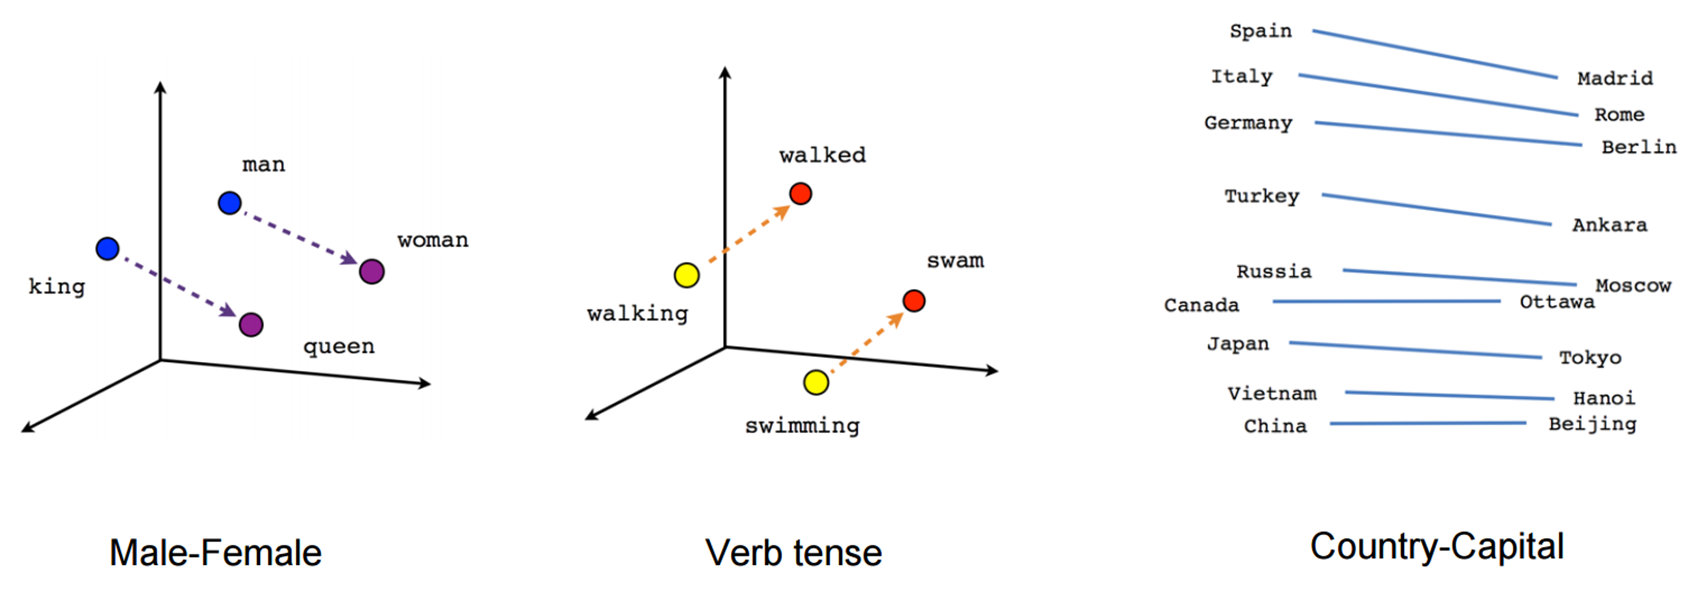

* Many ways to do embedding...
    * Word2Vec
    * GLoVE
    * ELMo
    * __BERT__
    * ...

> He went to the prison __cell__ with his __cell__ phone to collect blood __cell__ samples from the inmates.

In [148]:
from transformers import pipeline

In [149]:
model_checkpoint = "mrm8488/bert-tiny-finetuned-sms-spam-detection"

In [150]:
clf = pipeline("text-classification", model=model_checkpoint)

In [151]:
#clf.__dict__['model']

In [152]:
#Let's use this model to make predictions
yhat = clf(list(data.text))
yhat[:5]

[{'label': 'LABEL_0', 'score': 0.8298938870429993},
 {'label': 'LABEL_0', 'score': 0.9369619488716125},
 {'label': 'LABEL_1', 'score': 0.8097923994064331},
 {'label': 'LABEL_0', 'score': 0.9376350045204163},
 {'label': 'LABEL_0', 'score': 0.9380092024803162}]

In [153]:
#Get just the 1s and 0s for the predicted class
yhat = [int(prediction['label'][-1]) for prediction in yhat]

In [154]:
ytrue = list(y) #list(data.label)

In [155]:
print(yhat[:10])
print(ytrue[:10])

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [156]:
#Calculate metrics
accuracy = accuracy_score(ytrue, yhat)
precision = precision_score(ytrue, yhat)
recall = recall_score(ytrue, yhat)
f1 = f1_score(ytrue, yhat)
    
#Fill performance dataframe
performance.loc['DL',:] = accuracy, precision, recall, f1

#Order performance dataframe and show
performance = performance.sort_values('F1', ascending=False)
performance

,accuracy,precision,recall,F1
lr,0.958,0.977273,0.68254,0.803738
DL,0.941493,0.864818,0.668005,0.753776
gnb,0.884,0.524752,0.84127,0.646341
knn,0.93,1.0,0.444444,0.615385


Is this a fair comparison?  
What could we have done to make this a fair comparison? Why didn't we do it?